In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
jnjdata = yf.download('jnj ', start="2014-01-01", end='2023-12-31')

jnjdata

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,91.139999,91.730003,91.010002,91.029999,68.816673,5919600
2014-01-03,91.290001,92.220001,91.260002,91.849998,69.436607,5637600
2014-01-06,91.930000,92.750000,91.870003,92.330002,69.799484,7443500
2014-01-07,93.040001,94.620003,92.989998,94.290001,71.281189,11063300
2014-01-08,94.169998,94.599998,93.879997,94.160004,71.182907,9096700
...,...,...,...,...,...,...
2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100


In [5]:
jnjdata['H-L'] = jnjdata['High'] - jnjdata['Low'] 
jnjdata['O-C'] = jnjdata['Close'] - jnjdata['Open'] 

jnjdata['3day MA'] = jnjdata['Close'].shift(1).rolling(window = 3).mean() 
jnjdata['10day MA'] = jnjdata['Close'].shift(1).rolling(window = 10).mean() 
jnjdata['30day MA'] = jnjdata['Close'].shift(1).rolling(window = 30).mean() 

jnjdata['Std_dev']= jnjdata['Close'].rolling(5).std() 

jnjdata['Price_Rise'] = np.where(jnjdata['Close'].shift(-1) >jnjdata['Close'], 1, 0)

jnjdata = jnjdata.dropna() 
jnjdata.head(10)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
Date,,,,,,,,,,,,,
2014-02-14,92.599998,92.949997,92.029999,92.760002,70.124580,5485100,0.919998,0.160004,92.649999,89.696000,91.798333,0.748285,0
2014-02-18,92.769997,92.849998,92.089996,92.169998,69.678528,6926500,0.760002,-0.599998,92.579999,90.125000,91.856000,0.307621,0
2014-02-19,92.150002,92.750000,91.570000,91.639999,69.277840,7693400,1.180000,-0.510002,92.496666,90.664000,91.866667,0.431741,1
2014-02-20,91.690002,92.730003,91.309998,92.379997,69.837273,8160100,1.420006,0.689995,92.190000,91.166000,91.843667,0.429558,0
2014-02-21,91.860001,92.250000,91.449997,91.519997,69.685013,7381500,0.800003,-0.340004,92.063332,91.675999,91.780000,0.516412,0
2014-02-24,91.449997,92.059998,91.099998,91.110001,69.372787,8406700,0.959999,-0.339996,91.846664,91.952999,91.692000,0.511595,0
2014-02-25,91.589996,91.870003,90.660004,91.110001,69.372787,6383400,1.209999,-0.479996,91.669998,92.059999,91.571333,0.520835,0
2014-02-26,91.110001,91.540001,90.769997,91.110001,69.372787,6334100,0.770004,0.000000,91.246666,92.063999,91.450333,0.551478,1
2014-02-27,91.160004,91.419998,90.750000,91.360001,69.563164,7040300,0.669998,0.199997,91.110001,91.877999,91.337333,0.189392,1


In [6]:
#3 EDA of Created Features

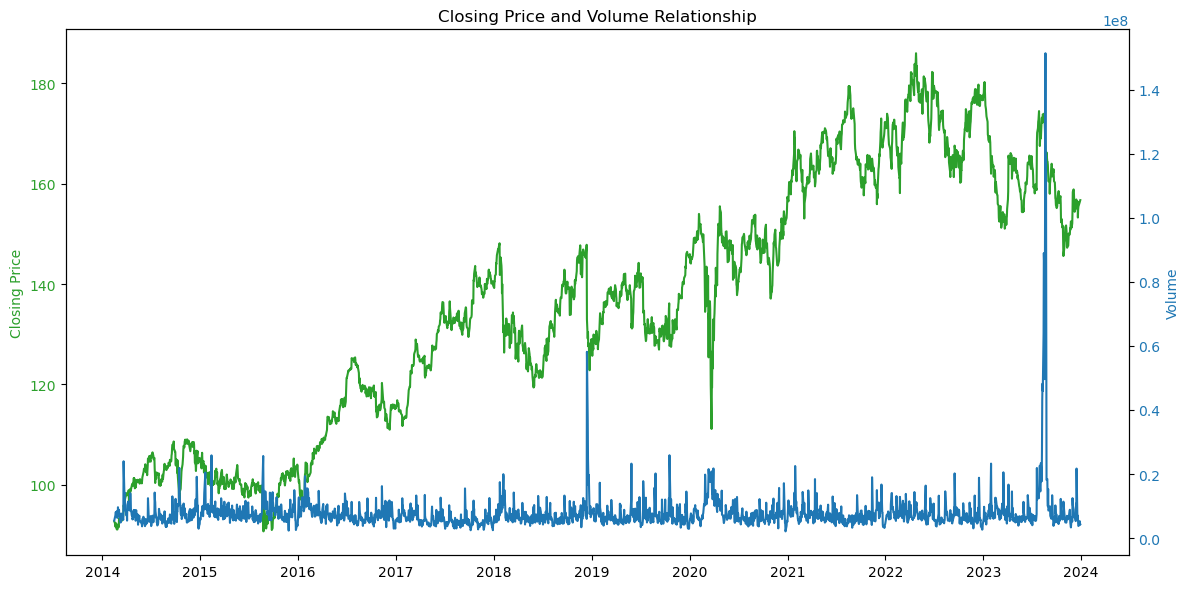

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(jnjdata['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(jnjdata['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()

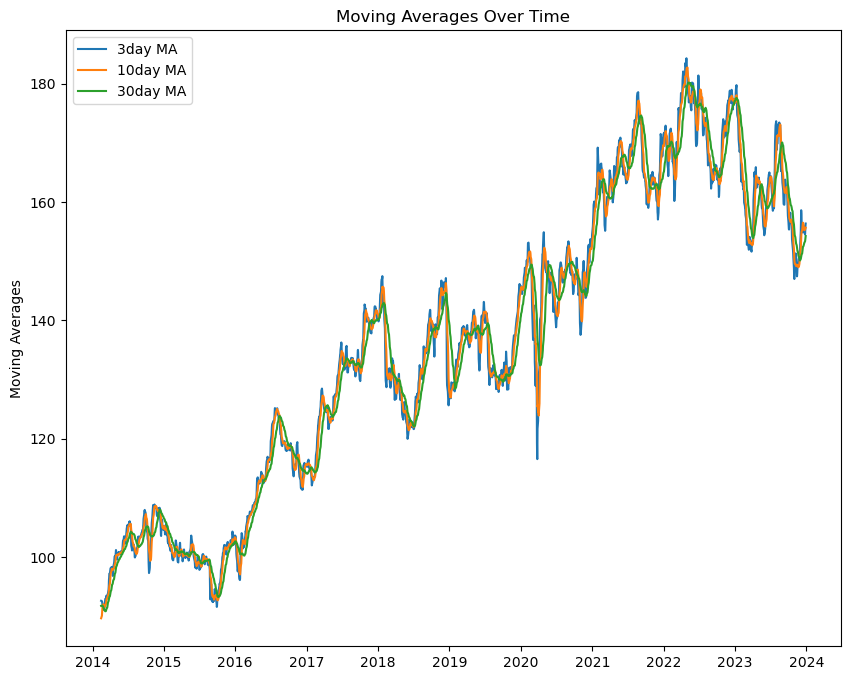

In [8]:
plt.figure(figsize=(10,8 ))

plt.plot(jnjdata['3day MA'], label='3day MA')
plt.plot(jnjdata['10day MA'], label='10day MA')
plt.plot(jnjdata['30day MA'], label='30day MA')

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()

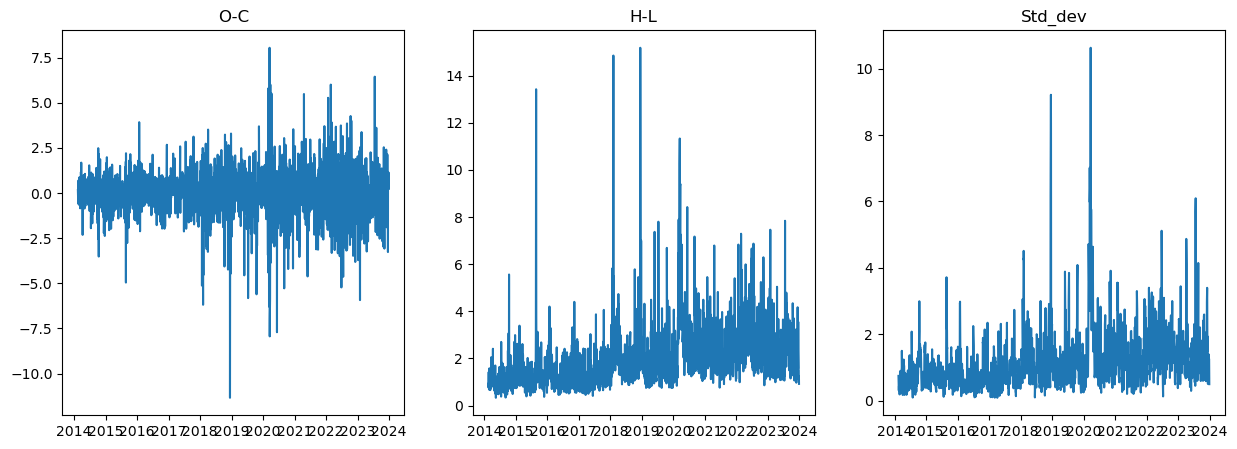

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(jnjdata['O-C'])
axes[0].set_title('O-C')
axes[1].plot(jnjdata['H-L'])
axes[1].set_title('H-L')
axes[2].plot(jnjdata['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()

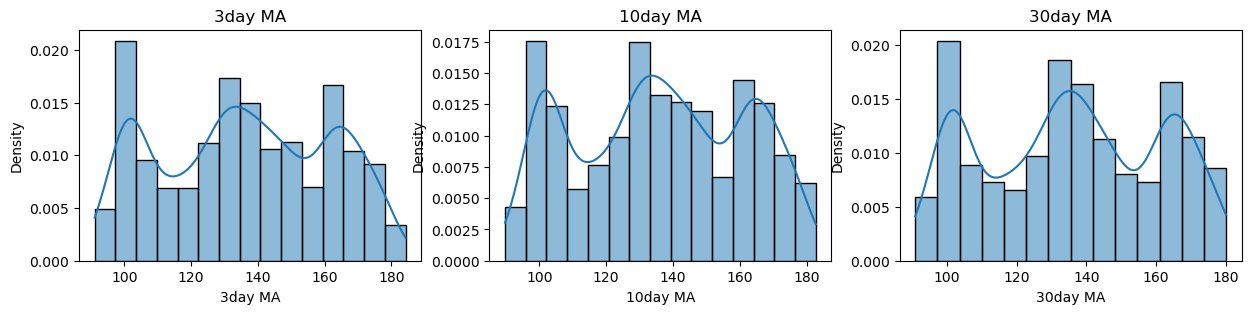

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=jnjdata, x="3day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('3day MA')

sns.histplot(data=jnjdata, x="10day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('10day MA')

sns.histplot(data=jnjdata, x="30day MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('30day MA')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


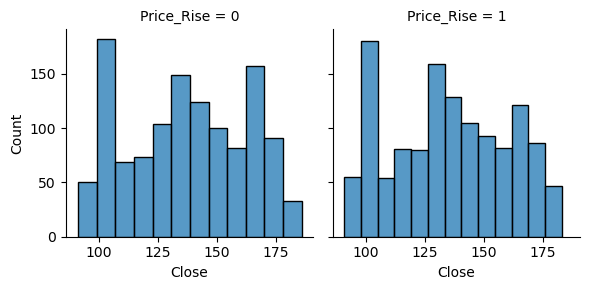

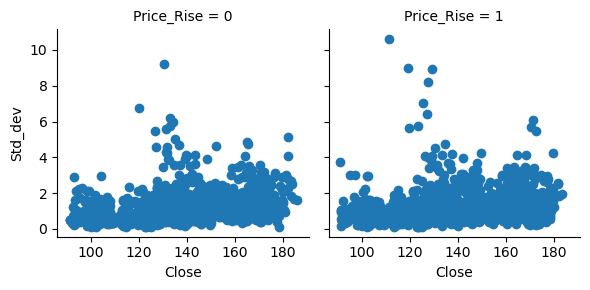

In [11]:
chart = sns.FacetGrid(jnjdata, col='Price_Rise')  
chart.map(sns.histplot, 'Close') 

chart = sns.FacetGrid(jnjdata, col='Price_Rise')  
chart.map(plt.scatter, 'Close','Std_dev')  

In [12]:
jnjdata.describe()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
count,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2.486000e+03,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,136.091018,137.040913,135.097377,136.101818,119.974041,7.737549e+06,1.943536,0.010800,136.050298,135.957722,135.699857,1.212353,0.511665
std,24.947435,25.172798,24.737177,24.951616,30.245030,6.064860e+06,1.246845,1.309138,24.954270,24.951641,24.949746,0.915091,0.499964
min,90.699997,91.419998,81.790001,90.730003,69.277840,2.114900e+06,0.330002,-11.339996,91.110001,89.696000,90.880333,0.089050,0.000000
25%,114.947502,115.714998,114.417503,114.900002,93.989237,5.552675e+06,1.159990,-0.590012,114.967501,114.792000,114.620500,0.631324,0.000000
50%,136.095001,137.189995,135.139999,136.365005,117.725349,6.699200e+06,1.644997,0.030006,136.098335,136.185500,136.217333,0.982407,1.000000
75%,158.910004,160.080002,157.730000,158.902504,150.583736,8.406200e+06,2.369995,0.699997,158.951669,159.286750,159.831500,1.524039,1.000000
max,185.100006,186.690002,184.179993,186.009995,175.705063,1.513195e+08,15.180008,8.039993,184.263331,182.722000,180.163332,10.626107,1.000000


In [13]:
jnjdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2486 entries, 2014-02-14 to 2023-12-29
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2486 non-null   float64
 1   High        2486 non-null   float64
 2   Low         2486 non-null   float64
 3   Close       2486 non-null   float64
 4   Adj Close   2486 non-null   float64
 5   Volume      2486 non-null   int64  
 6   H-L         2486 non-null   float64
 7   O-C         2486 non-null   float64
 8   3day MA     2486 non-null   float64
 9   10day MA    2486 non-null   float64
 10  30day MA    2486 non-null   float64
 11  Std_dev     2486 non-null   float64
 12  Price_Rise  2486 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 262.2 KB


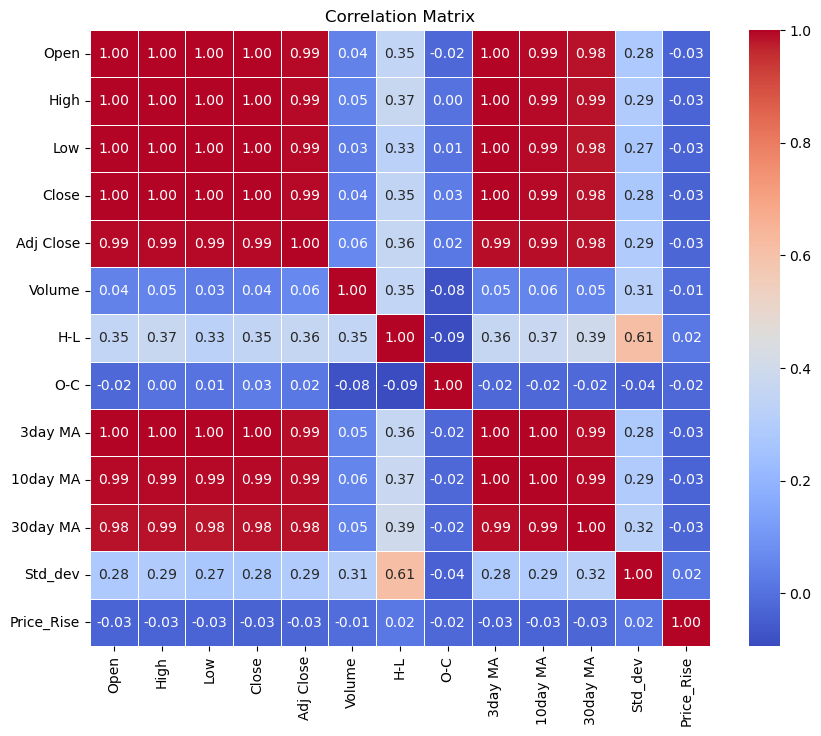

In [14]:
corr_matrix = jnjdata.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [15]:
#Set target variable y(Price_Rise 0 or 1 )and features x 
#(from H-L column to Std_dev column)
X = jnjdata.iloc[:, 5:-1] 
Y = jnjdata.iloc[:, -1]

In [16]:
X

,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,
2014-02-14,5485100,0.919998,0.160004,92.649999,89.696000,91.798333,0.748285
2014-02-18,6926500,0.760002,-0.599998,92.579999,90.125000,91.856000,0.307621
2014-02-19,7693400,1.180000,-0.510002,92.496666,90.664000,91.866667,0.431741
2014-02-20,8160100,1.420006,0.689995,92.190000,91.166000,91.843667,0.429558
2014-02-21,7381500,0.800003,-0.340004,92.063332,91.675999,91.780000,0.516412
...,...,...,...,...,...,...,...
2023-12-22,3798500,1.509995,0.210007,154.856669,155.238000,153.096334,1.173790
2023-12-26,4170000,1.500000,1.139999,154.523336,155.342001,153.364335,1.263678
2023-12-27,5288100,1.100006,0.850006,155.480001,155.450002,153.660668,1.237688


In [17]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test


,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,
2022-01-06,7301600,1.699997,-0.519989,171.613332,170.597000,166.148000,0.473781
2022-01-07,6986000,3.169998,2.489990,171.643336,170.967001,166.512666,1.119208
2022-01-10,7698400,1.529999,-0.600006,172.600001,171.537001,166.969666,1.145218
2022-01-11,8341100,3.279999,-1.740005,172.889999,171.879001,167.432666,1.098005
2022-01-12,8116200,1.740005,0.179993,172.763331,171.969000,167.815999,1.624599
...,...,...,...,...,...,...,...
2023-12-22,3798500,1.509995,0.210007,154.856669,155.238000,153.096334,1.173790
2023-12-26,4170000,1.500000,1.139999,154.523336,155.342001,153.364335,1.263678
2023-12-27,5288100,1.100006,0.850006,155.480001,155.450002,153.660668,1.237688


In [18]:
# Standardize the features (optional but can be beneficial for 
#logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.32      0.40       258
           1       0.49      0.70      0.57       240

    accuracy                           0.50       498
   macro avg       0.51      0.51      0.49       498
weighted avg       0.51      0.50      0.48       498



In [20]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       258
           1       0.51      0.43      0.47       240

    accuracy                           0.53       498
   macro avg       0.53      0.53      0.52       498
weighted avg       0.53      0.53      0.53       498



In [21]:
accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.51
Standard Deviation: 0.00


In [22]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.49
Standard Deviation Accuracy: 0.01


In [23]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.62      0.58       258
           1       0.51      0.43      0.47       240

    accuracy                           0.53       498
   macro avg       0.53      0.53      0.52       498
weighted avg       0.53      0.53      0.53       498



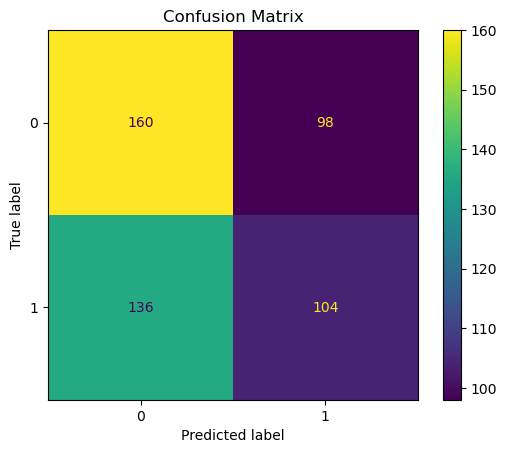

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

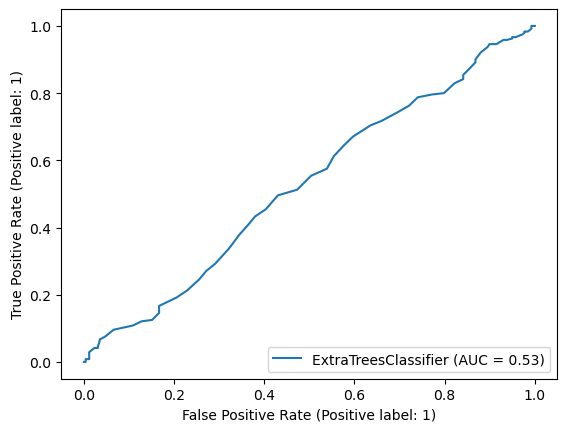

In [25]:
# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

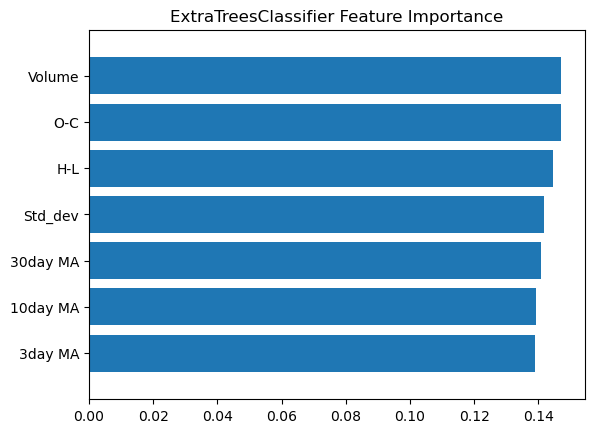

In [26]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

In [27]:
jnjdata['Y_pred'] = np.NaN
jnjdata.iloc[(len(jnjdata) - len(Y_pred)):,-1] = Y_pred
trade_jnjdata = jnjdata.dropna()
trade_jnjdata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
Date,,,,,,,,,,,,,,
2022-01-06,172.149994,172.500000,170.800003,171.630005,161.087662,7301600,1.699997,-0.519989,171.613332,170.597000,166.148000,0.473781,1,0.0
2022-01-07,171.460007,174.300003,171.130005,173.949997,163.265167,6986000,3.169998,2.489990,171.643336,170.967001,166.512666,1.119208,0,0.0
2022-01-10,173.690002,173.690002,172.160004,173.089996,162.457993,7698400,1.529999,-0.600006,172.600001,171.537001,166.969666,1.145218,0,1.0
2022-01-11,172.990005,173.389999,170.110001,171.250000,160.731018,8341100,3.279999,-1.740005,172.889999,171.879001,167.432666,1.098005,0,1.0
2022-01-12,169.610001,170.080002,168.339996,169.789993,159.360672,8116200,1.740005,0.179993,172.763331,171.969000,167.815999,1.624599,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500,1.509995,0.210007,154.856669,155.238000,153.096334,1.173790,1,1.0
2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000,1.500000,1.139999,154.523336,155.342001,153.364335,1.263678,1,1.0
2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100,1.100006,0.850006,155.480001,155.450002,153.660668,1.237688,1,1.0


In [28]:
trade_jnjdata['Tomorrows Returns'] = 0.
trade_jnjdata['Tomorrows Returns'] = np.log(trade_jnjdata['Close']/trade_jnjdata['Close'].shift(1))
trade_jnjdata['Tomorrows Returns'] = trade_jnjdata['Tomorrows Returns'].shift(-1)
trade_jnjdata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
Date,,,,,,,,,,,,,,,
2022-01-06,172.149994,172.500000,170.800003,171.630005,161.087662,7301600,1.699997,-0.519989,171.613332,170.597000,166.148000,0.473781,1,0.0,0.013427
2022-01-07,171.460007,174.300003,171.130005,173.949997,163.265167,6986000,3.169998,2.489990,171.643336,170.967001,166.512666,1.119208,0,0.0,-0.004956
2022-01-10,173.690002,173.690002,172.160004,173.089996,162.457993,7698400,1.529999,-0.600006,172.600001,171.537001,166.969666,1.145218,0,1.0,-0.010687
2022-01-11,172.990005,173.389999,170.110001,171.250000,160.731018,8341100,3.279999,-1.740005,172.889999,171.879001,167.432666,1.098005,0,1.0,-0.008562
2022-01-12,169.610001,170.080002,168.339996,169.789993,159.360672,8116200,1.740005,0.179993,172.763331,171.969000,167.815999,1.624599,0,0.0,-0.006085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500,1.509995,0.210007,154.856669,155.238000,153.096334,1.173790,1,1.0,0.004365
2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000,1.500000,1.139999,154.523336,155.342001,153.364335,1.263678,1,1.0,0.001344
2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100,1.100006,0.850006,155.480001,155.450002,153.660668,1.237688,1,1.0,0.001470


In [29]:
#Strategy Returns based on Y_Pred
trade_jnjdata['Strategy Returns'] = 0.
trade_jnjdata['Strategy Returns'] = np.where(trade_jnjdata['Y_pred'] == True,
                                 trade_jnjdata['Tomorrows Returns'], - trade_jnjdata['Tomorrows Returns'])
trade_jnjdata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,
2022-01-06,172.149994,172.500000,170.800003,171.630005,161.087662,7301600,1.699997,-0.519989,171.613332,170.597000,166.148000,0.473781,1,0.0,0.013427,-0.013427
2022-01-07,171.460007,174.300003,171.130005,173.949997,163.265167,6986000,3.169998,2.489990,171.643336,170.967001,166.512666,1.119208,0,0.0,-0.004956,0.004956
2022-01-10,173.690002,173.690002,172.160004,173.089996,162.457993,7698400,1.529999,-0.600006,172.600001,171.537001,166.969666,1.145218,0,1.0,-0.010687,-0.010687
2022-01-11,172.990005,173.389999,170.110001,171.250000,160.731018,8341100,3.279999,-1.740005,172.889999,171.879001,167.432666,1.098005,0,1.0,-0.008562,-0.008562
2022-01-12,169.610001,170.080002,168.339996,169.789993,159.360672,8116200,1.740005,0.179993,172.763331,171.969000,167.815999,1.624599,0,0.0,-0.006085,0.006085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500,1.509995,0.210007,154.856669,155.238000,153.096334,1.173790,1,1.0,0.004365,0.004365
2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000,1.500000,1.139999,154.523336,155.342001,153.364335,1.263678,1,1.0,0.001344,0.001344
2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100,1.100006,0.850006,155.480001,155.450002,153.660668,1.237688,1,1.0,0.001470,0.001470


In [30]:
trade_jnjdata['Cumulative Market Returns'] = np.cumsum(trade_jnjdata['Tomorrows Returns'])
trade_jnjdata['Cumulative Strategy Returns'] = np.cumsum(trade_jnjdata['Strategy Returns'])

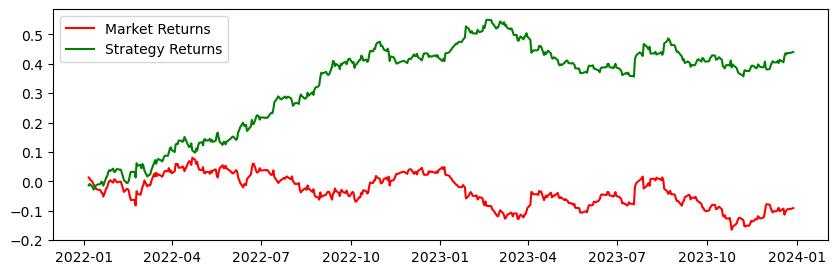

In [31]:
plt.figure(figsize=(10,3))
plt.plot(trade_jnjdata['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_jnjdata['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()